## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [2]:
import pandas
from zipfile import ZipFile
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#1) reading zip file and getting files info
with ZipFile('preprocessed_cases[cases_29404].zip', 'r') as zipObj:
   filist=zipObj.infolist()

#getting all folders inside parent folder
categories = []
par_dir = 'preprocessed_cases[cases_29404]/'
for fileinfo in  filist:
  if(fileinfo.is_dir() and fileinfo.filename!= par_dir):
    categories.append(int(fileinfo.filename.split('/')[-2]))
print('1) Total number of categories is ',len(categories))

#2) Files in each category
categories.sort()
for category in categories:
  doccount = 0
  for fileinfo in  filist:
    if(fileinfo.is_dir()==False and fileinfo.filename.startswith(par_dir+str(category)+'/')):
      doccount+=1
  print(' The number of documents in {} category is {}'.format(category,doccount))

#declaring required variables
sentcount=0
filecount =0
words =[]
st_words = stopwords.words('english')

#opening each file and counting words and sentences, 
with ZipFile('preprocessed_cases[cases_29404].zip', 'r') as zipObj:
  for fileinfo in filist:
    if(fileinfo.is_dir()==False):
      filecount+=1
      cont_file=zipObj.open(fileinfo.filename,'r')
      content_f=cont_file.read()

      words.extend(content_f.decode().split())
      sentcount+= str(content_f).count('.')+str(content_f).count('?')+str(content_f).count('!')
      
#  
words_withoutstopwords=[str(word) for word in words if str(word).lower() not in st_words]

print('3) The average number of sentences are', sentcount/filecount ) 
print('4) The average number of words per are', len(words)/filecount)
print('5) the top 50 terms and frequencies are', Counter(words_withoutstopwords).most_common(50))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1) Total number of categories is  76
 The number of documents in 1 category is 775
 The number of documents in 2 category is 179
 The number of documents in 3 category is 184
 The number of documents in 4 category is 231
 The number of documents in 5 category is 751
 The number of documents in 6 category is 380
 The number of documents in 7 category is 621
 The number of documents in 8 category is 521
 The number of documents in 9 category is 744
 The number of documents in 10 category is 584
 The number of documents in 11 category is 605
 The number of documents in 12 category is 275
 The number of documents in 13 category is 458
 The number of documents in 14 category is 277
 The number of documents in 15 category is 257
 The number of documents in 16 category is 826
 The number of documents in 17 category is 125
 The number of documents in 18 category is 509
 The number of documents in 19 category is 349
 The number of documents in 20 category is 1129
 The number of documents in 21 

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

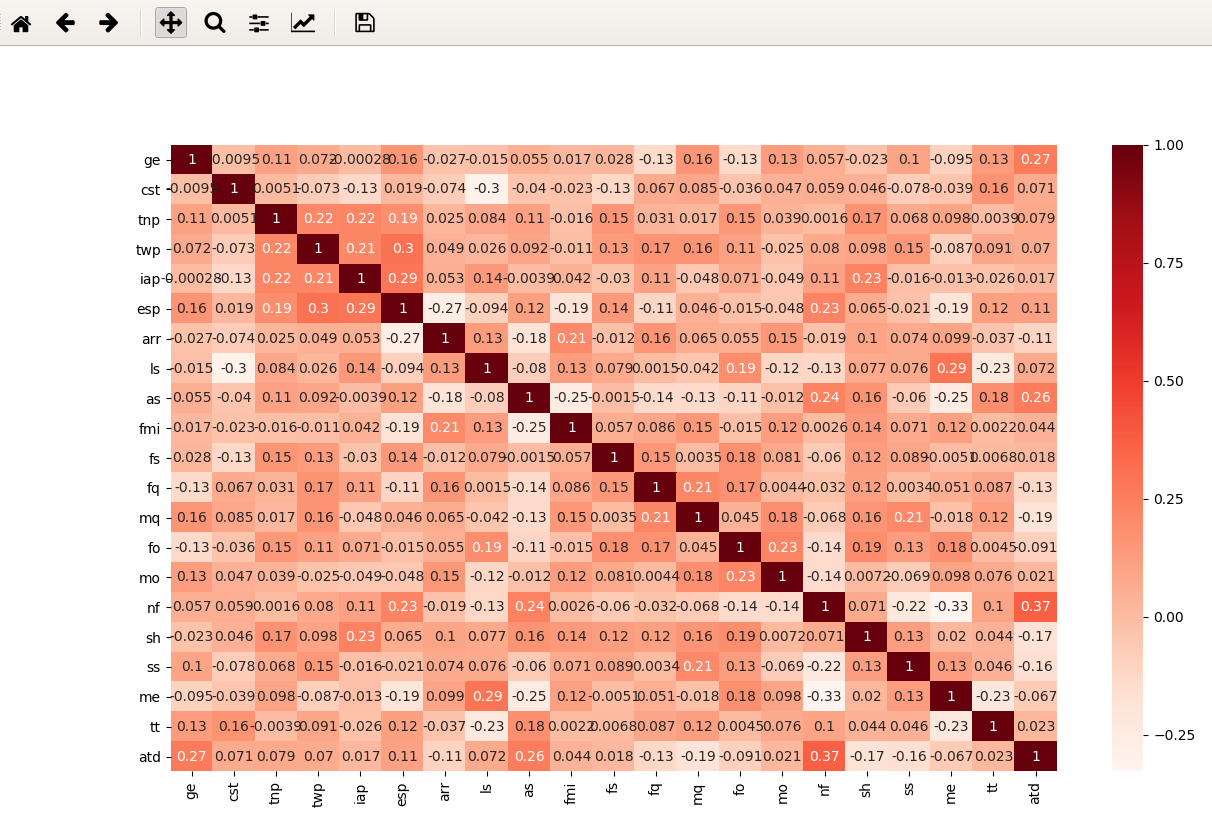

In [26]:
# 1

import pandas as pd
# reading data from git
datf = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv')
# we loop through each file and print the following details
for col in datf.columns:
    print("Each column:",col)
    print("Number of rows:", datf[col].shape[0])
    print("Unique values in columns:", datf[col].value_counts().shape[0])
    print(datf[col].value_counts())
    print()


Each column: ge
Number of rows: 131
Unique values in columns: 2
M    72
F    59
Name: ge, dtype: int64

Each column: cst
Number of rows: 131
Unique values in columns: 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Each column: tnp
Number of rows: 131
Unique values in columns: 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Each column: twp
Number of rows: 131
Unique values in columns: 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Each column: iap
Number of rows: 131
Unique values in columns: 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Each column: esp
Number of rows: 131
Unique values in columns: 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Each column: arr
Number of rows: 131
Unique values in columns: 2
N    78
Y    53
Name: arr, dtype: int64

Each column: ms
Number of rows: 131
Unique values in columns: 1
Unmarried    131
Name: ms, dtype: int64

Each

C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


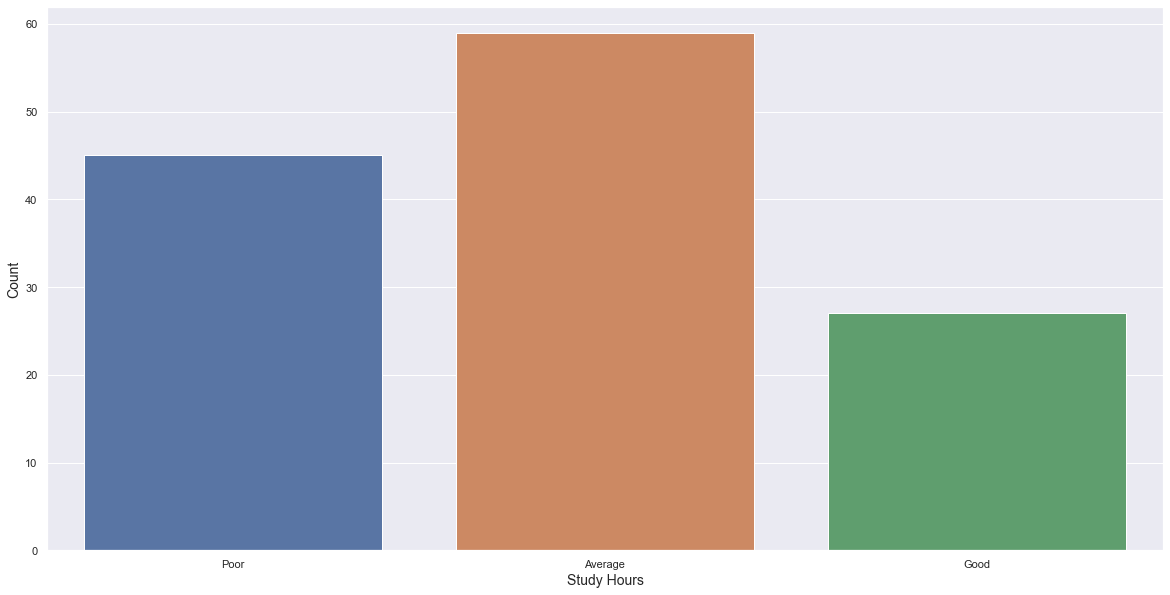

In [27]:
#2)
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.countplot(datf['sh'])
plt.xlabel("Study Hours", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

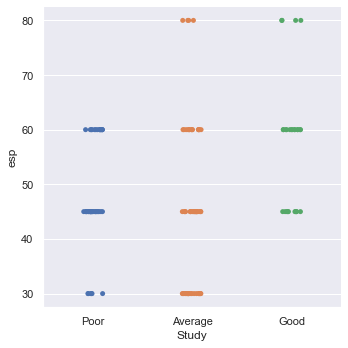

In [40]:
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
xyz = pd.DataFrame()
xyz['Study']=pd.DataFrame(datf.sh)
xyz['esp']=pd.DataFrame(datf.esp)
xyz['esp'].mask(xyz['esp'] == 'Best', 80, inplace=True)
xyz['esp'].mask(xyz['esp'] == 'Vg', 60, inplace=True)
xyz['esp'].mask(xyz['esp'] == 'Good', 45, inplace=True)
xyz['esp'].mask(xyz['esp'] == 'Pass', 30, inplace=True)
xyz['esp'].mask(xyz['esp'] == 'Fail', 30, inplace=True)
xyz['exampercent']=pd.DataFrame(datf.esp)
sbn.catplot(x='Study',y='esp', data=xyz)
plt.show()

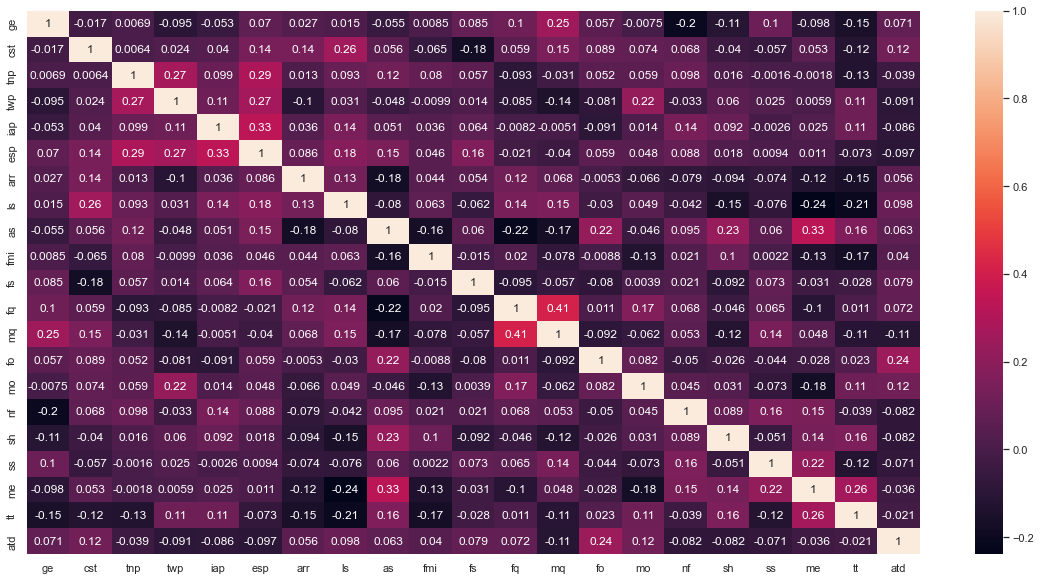

In [13]:
# 4.)

from sklearn import preprocessing
import seaborn as sbn
lab_encoder = preprocessing.LabelEncoder()  
def Enecoder(datf):
    col2Encode = list(datf.select_dtypes(include=['category','object']))
    lbe = preprocessing.LabelEncoder()
    # we convert categorical columns data into numerical data
    for feature in col2Encode:
        try:
            datf[feature] = lbe.fit_transform(datf[feature])
        except:
            print('Error encoding '+feature)
    return datf

datf1 = Enecoder(datf)
# we drop the ms column
datf1 = datf1.drop('ms', axis = 1)

# we get the correlation data
cor = datf1.corr()
sbn.set(rc = {'figure.figsize':(20,10)})
sbn.heatmap(cor,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [8]:
# Your three questions:

'''
I had chosen a mobile price sharing dataset.
I want to answer the following questions from the dataset.

Q1.) Are the dataset is having any null values in the dataset?

Q2.) What is the highest battery power?

Q3.) what is the lowest ram value?


'''

'\nPlease list your questions here:\n\n\n\n\n\n'

In [2]:
# 1)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sbn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

mbl=pd.read_csv('C:/Users/vishn/Downloads/train.csv')
# counting null values in each column
mbl.isnull().sum()







battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
#2)Highest Battery_power value
bp=mbl.battery_power.max()
print(bp)

1998


In [13]:
# Lowest Ram Value
Lowram=mbl.ram.min()
print(Lowram)
  


256
